<h1> NLP and the Web - WS 20/21: Home Exercise 5 </h1>

In this exercise, you will be able to perform part-of-speech tagging by yourself using Hidden Markov Models.
Part-of-speech tagging (POS tagging) is the process assigning a syntactic label to each token in a document. This
kind of tagging gives us more information about surrounding words, e.g. adjectives occur more often before a noun and
after a determiner and verbs appear usually after a noun. As an example, here we have two sentences:<br><br>
"Time flies like an arrow."<br>
"Fruit flies ate a banana"

A tokenizer would split them into the following tokens:

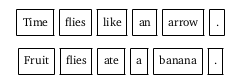

A part-of-speech tagger (spaCy tagger) could then assign labels, or <b>tags</b>, to the tokens according to their respective parts
of speech:

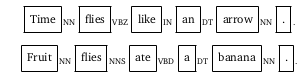

Hidden Markov Models (HMMs): are graphical probabilistic models that enable us to talk about observed and hidden
events. The latter being considered as causal factors in the model (Jurafky & Martin, 2019). For instance, in our real
world we can see words but we cannot see pos-tags. Given the explanation of HMMs in the lecture and in our lab session,
we will find the best pos sequence for a given word sequence using the Bayes’ Rule and the Viterbi Algorithm, please
refer to slides from both Lecture and Lab session for further details.<br><br>
<b>Note:</b> For this exercise, you may only use spaCy, scikit-learn, NumPy, Pandas and internal packages from Python. Please
follow the instructions as given below and in case of questions use our Discussion forum in Moodle, we don’t answer
questions via email.
<br>
<br>
Using the files <i>transisition_probabilities.csv</i> and <i>observation_likelihoods.csv</i>, compute the likelihood of POS tags for the
following word sequence:

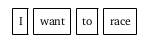

<i>Please use comments where appropriate to help tutors understand your code.</i>

<b>Task 1 - 4 points</b>

Load the given files and:

In [1]:
import pandas as pd

# Load CSV files
observation_likelihood = pd.read_csv('observation_likelihoods.csv')
transition_probability = pd.read_csv('transisition_probabilities.csv')

# Assign labels for better readability
observation_likelihood.columns = ['Tags', ' I', ' want', ' to ', ' race']
transition_probability.columns = ['Tags', 'VB', 'TO', 'NN', 'PPSS']

# setting tags as index column
observation_likelihood.set_index("Tags", inplace = True)
transition_probability.set_index("Tags", inplace = True)

In [2]:
transition_probability

,VB,TO,NN,PPSS
Tags,,,,
<s>,0.0190,0.00430,0.04100,0.06700
VB,0.0038,0.03500,0.04700,0.00700
TO,0.8300,0.00000,0.00047,0.00000
NN,0.0040,0.01600,0.08700,0.00450
PPSS,0.2300,0.00079,0.00120,0.00014


In [3]:
observation_likelihood

,I,want,to,race
Tags,,,,
VB,0.00,0.009300,0.00,0.00012
TO,0.00,0.000000,0.99,0.00000
NN,0.00,0.000054,0.00,0.00057
PPSS,0.37,0.000000,0.00,0.00000


a) Write a function to obtain a list of all possible tag sequences for the word sequence given above and store them in a list. Print the first 5 tag sequences as well as the total number of sequences

In [4]:
import itertools

def calculate_tag_permutations(observations):
    """
    Calculates an array-like object of all possible tag permutations for the token sequence
    
    :param observations: any object that contains all possible tags
    :return: array-like object of all tag permutations
    """
    
    return [p for p in itertools.product(observations, repeat=len(observations))]

In [5]:
comb = calculate_tag_permutations(transition_probability.columns[0:])
print("First 5  combinations: ", comb[:5], sep= "\n")
print("Total number of sequences:", len(comb))

First 5  combinations: 
[('VB', 'VB', 'VB', 'VB'), ('VB', 'VB', 'VB', 'TO'), ('VB', 'VB', 'VB', 'NN'), ('VB', 'VB', 'VB', 'PPSS'), ('VB', 'VB', 'TO', 'VB')]
Total number of sequences: 256


b) Implement the Hidden Markov Model (HMM) discussed in the lecture and use it to assign a probability to each possible sequence. Print the most likely tag sequence and its probability 

In [6]:
import operator
import numpy as np
def calculate_sequence_probability(sequence, observations, transitions):
    """
    Calculates a probability for a tag sequence using the Hidden Markov Model
    
    :param sequence: array-like object of a POS tag sequence
    :param observations: array-like object of observation probabilities
    :param transitions: array-like object of transition probabilities
    :return: Probability of the POS sequence
    """
    join_prob = []
    
    words = observation_likelihood.columns[0:]
    
    
    # p(w_i|t_i) Emission prob
    for i, tag in enumerate(sequence): 
        join_prob.append(observations.loc[tag, observation_likelihood.columns[i]])
    
    join_prob.append(transition_probability.loc['<s>', sequence[0]])
    
    # p(t_i|t_i-1) Transition 
    for i, tag in enumerate(sequence):
        if i > 0: 
            join_prob.append(transitions.loc[sequence[i-1],tag])        
    
    
    
    return np.prod(join_prob)

def score_tag_sequences(sequences, observations, transitions):
    """
    Calculate the sequences probability for every entry in an array-like object of POS sequences
    
    :param sequences: array-like object of POS tag sequences
    :param observations: array-like object of observation probabilities
    :param transitions: array-like object of transition probabilities
    :return: array-like object that contains a POS sequence and a probability for every entry
    """
    seq_scores = {}
    for seq in sequences: 
        seq_scores[tuple(seq)] = calculate_sequence_probability(seq, observations, transitions)
    return seq_scores

def find_sequence_with_highest_probability(scored_sequences):
    """
    Returns the POS tag sequence and probability with the highest probability from an array-like object that contains a POS sequence and a probability for every entry
    
    :param scored_sequences: array-like object that contains a POS sequence and a probability for every entry
    :return: Tuple of sequence and probability 
    """
    return {k: v for k, v in sorted(scored_sequences.items(), key=lambda item: item[1], reverse =True)}

In [7]:
scored_sequences = score_tag_sequences(comb, observation_likelihood,transition_probability)
highest_score_seq = find_sequence_with_highest_probability(scored_sequences)

In [8]:
print("The most likely sequence: ", list(highest_score_seq.keys())[0])
print("Probability: ", highest_score_seq[list(highest_score_seq.keys())[0]])

The most likely sequence:  ('PPSS', 'VB', 'TO', 'VB')
Probability:  1.829994939234e-10


c) Why would the naive solution of scoring each tag sequence not scale up to real world problems ? How does the Viterbi algorithm relate to that ? Discuss in up to 3 sentences

__Answer:__ In this example, we only take in to consideration 4 possibles tags, therefore we have 256 possible combinations of tags. If we take into account all possible tags and have a much longer sentence, the number of possible combination will exponentially increase and the calculation become computationally expensive

<b>Task 2 - 6 points</b>

Implement the Viterbi algorithm as shown in slide 13 of our Lab Session 5 and apply it to the data from above:

a) Compute the initialization step of Viterbi given transition and observation probability and print the probability matrix

In [9]:
# A - initialise stuff
nSamples = 4
nStates = 4 # number of states
c = np.zeros(4) # scale factors (necessary to prevent underflow)

# Accumulated probability matrix 
viterbi = np.zeros((nStates,nSamples)) 
# Backtracking matrix 
psi = np.zeros((nStates,nSamples))
# Best path sequence
best_path = np.zeros(nSamples); 
print("Accumulated probability matrix: ", viterbi, sep="\n")

Accumulated probability matrix: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


b) Compute the recursion step of Viterbi given transition and observation probability and print the probability matrix again

In [10]:
viterbi[:,0] = C * B[:,O[0]]

# Scaling factor to prevent underflow
c[0] = 1.0/np.sum(viterbi[:,0])

viterbi[:,0] = c[0] * viterbi[:,0] 

psi[0] = 0;

#### Viterbi iterations

# Loop through observations
for t in range(1,nSamples): 
    # Loop through states
    for s in range (0,nStates):
        trans_p = viterbi[:,t-1] * A[:,s]
        psi[s,t], viterbi[s,t] = max(enumerate(trans_p), key=operator.itemgetter(1))
        viterbi[s,t] = viterbi[s,t]*B[s,O[t]]

    c[t] = 1.0/np.sum(viterbi[:,t]) # apply scaling factor
    viterbi[:,t] = c[t] * viterbi[:,t]

print("Accumulated probability matrix: ", viterbi, sep="\n")    

NameError: name 'C' is not defined

c) Compute the termination step of Viterbi given transition and observation probability and print the most likely tag sequence and its probability

In [ ]:
best_path[-1] =  np.argmax(psi[:, -1])   # States with highest prob 


for t in range(nSamples-1,0,-1): # states of (last-1)th to 0th time step
    best_path[t-1] = psi[int(best_path[t]),t]

# The tags of the path 
best_path_tags = [transition_probability.columns[0:][i] for i in best_path]
print('Best path=', best_path_tags, sep='\n')
print("The probability of the best path: ", viterbi[int(best_path[-1]),3])

Please upload in Moodle your working Jupyter-Notebook <b>before next lab session</b> <span style="color:red">(Dec 10st, 4:14pm)</span>. Submission format: ExerciseX_YourName.zip<br>
Submission should contain your filled out Jupyter notebook template (naming schema: ExerciseX_YourName.ipynb) and any auxiliar files that are necessary to run your code (e.g. datasets provided by us)